## Random forest and other classifiers

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from xgboost import XGBClassifier
import xgboost
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('../input/classification-datasetpckl/classification_dataset.pckl')

In [3]:
df_pixels_reversed = df[['R', 'G', 'B']].values[:, ::-1]
df['R'] = df_pixels_reversed[:, 0]
df['G'] = df_pixels_reversed[:, 1]
df['B'] = df_pixels_reversed[:, 2]

In [4]:
df['class'].unique()

array([b'vegetation', b'concrete', b'bare soil', b'water', b'buildings'],
      dtype=object)

In [5]:
df['classes'] = df['class'].replace({b'vegetation': 0, b'concrete': 1, b'bare soil': 2, b'water': 3, b'buildings': 4})

In [6]:
df['classes'].unique()

array([0, 1, 2, 3, 4])

In [7]:
df = df.drop(columns=['class'])

In [8]:
df.head(10)

,R,G,B,classes
0,15.0,33.0,27.0,0
1,21.0,36.0,35.0,0
2,1.0,13.0,13.0,0
3,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0
5,0.0,0.0,3.0,0
6,0.0,4.0,8.0,0
7,0.0,3.0,3.0,0
8,0.0,0.0,0.0,0
9,0.0,1.0,1.0,0


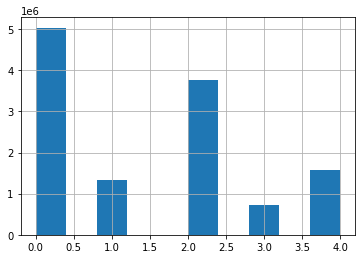

In [9]:
df['classes'].hist()

In [10]:
df_sampled = df.groupby('classes').apply(pd.DataFrame.sample, frac=.05)

In [11]:
df_sampled['classes'].value_counts()

0    251627
2    187971
4     79288
1     66304
3     36119
Name: classes, dtype: int64

In [12]:
X = df_sampled.drop(columns=['classes'])
#y = np.asarray(df_sampled['class'])
y=df_sampled.classes.values

In [13]:
#labelencoder =LabelBinarizer()
#y = labelencoder.fit_transform(y)

X.shape, y.shape

((621309, 3), (621309,))

In [14]:
#y=MultiLabelBinarizer().fit_transform(y) 

In [15]:
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(465981, 3)
(155328, 3)
(465981,)
(155328,)


In [17]:
y_test

array([2, 4, 3, ..., 4, 0, 0])

In [18]:
#y_train = np.ravel(y_train)
#y_train.shape

In [19]:
#y_train=y_train.astype('str') 

In [20]:
 clf_model = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=15,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     min_impurity_split=None,
     bootstrap=True,
     oob_score=False,
     n_jobs=-1,
     random_state=0,
     verbose=0,
     warm_start=False,
     class_weight='balanced'
)

clf_model.fit(X_train,y_train)
y_pred=clf_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8163885455294603


In [21]:
print(recall_score(y_test, y_pred, average='micro'))

0.8163885455294603


In [22]:
confusion_matrix(y_test, y_pred)

array([[56637,   303,  1023,  3881,  1095],
       [  289, 12527,  1484,   143,  2113],
       [ 1300,  4306, 37893,   142,  3359],
       [  468,    65,    41,  8250,   207],
       [  897,  3408,  3170,   826, 11501]])

In [23]:
xgb_params = dict(
    max_depth=30,
    learning_rate=0.1,
    n_estimators=100,
    booster='gbtree',
    objective='multi:softmax',
    gamma= 3,
    min_child_weight=1,
    num_class= 5
)

xgb_model = XGBClassifier(
    **xgb_params
)




In [24]:
cv_xgb = cross_validate(xgb_model, X_train, y_train, cv=5, scoring= 'accuracy')

In [25]:
cv_xgb['test_score'].mean()

0.8389612469204117

In [26]:
cv_rf = cross_validate(clf_model, X_train, y_train, cv=5, scoring= 'accuracy')

In [27]:
cv_rf['test_score'].mean()

0.8138958461754793

In [28]:
xgb_final = XGBClassifier(** xgb_params)
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=5, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
test_pred = xgb_final.predict(X_test)

## Test image 

In [30]:
#first_try = "../input/aerial-sampled2tif/aerial_sampled2.tif"

In [31]:
#example_image = cv2.imread(first_try)
#example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

In [32]:
#example_image.dtype

In [33]:
#def flatten_image(image):
#    return image.reshape((image.shape[0] * image.shape[1], *image.shape[2:]))

In [34]:
#flattened_example_image = flatten_image(example_image)

In [35]:
#flattened_example_image.shape

In [36]:
#clf_model.fit(flattened_example_image, y_train)
# example_clf = clf_model.predict(flattened_example_image)

In [37]:
##predicting on image
xgb_params = dict(
    max_depth=30,
    learning_rate=0.1,
    n_estimators=100,
    booster='gbtree',
    objective='multi:softmax',
    gamma= 3,
    min_child_weight=1,
    num_class= 5
)

xgb_model = XGBClassifier(
    **xgb_params
)


def flatten_image(image):
    return image.reshape((image.shape[0] * image.shape[1], *image.shape[2:]))   


def predict_on_image(model, image):
    flat_image = flatten_image(image)
    y_pred = model.predict(flat_image)
    prediction_colours = np.zeros((y_pred.shape[0], 3))
    colour_mapping = {
        0: (11, 102, 35),
        1: (134, 136, 138),
        2: (198, 162, 66),
        3: (10, 17, 114), 
        4: (75, 58, 38)
    }
    for i in range(y_pred.shape[0]):
        prediction = y_pred[i]
        prediction_colour = np.array(colour_mapping[prediction])
        prediction_colours[i] = prediction_colour
    
    return prediction_colours.reshape(image.shape)

In [38]:
#flat_image = flatten_image(example_image)
#example_y_pred = xgb_final.predict(flat_image)

In [39]:
#example_y_pred.min()

In [40]:
#example_predictions = predict_on_image(xgb_final, example_image)

In [41]:
#example_predictions[:, :, 0].max()

In [42]:
#plt.figure(figsize = (10,10))
#plt.imshow(example_predictions)